<a href="https://colab.research.google.com/github/Jawad-Flahi/Dimensionality-Reduction-Techniques/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Dependencies

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(5)

In [2]:
df = pd.read_csv("/content/loan_data.csv")

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
X = df.drop(['credit.policy','not.fully.paid','purpose'],axis=1)

In [5]:
X.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
scale = StandardScaler()

Scaled_data = scale.fit_transform(X)

Scaling the and centering the data

In [9]:
print(Scaled_data)

[[-0.13931753  2.46309947  0.68038804 ... -0.71698894 -0.29973008
  -0.23700318]
 [-0.57886837 -0.43885443  0.2440308  ... -0.71698894 -0.29973008
  -0.23700318]
 [ 0.48648368  0.23070836 -0.90865897 ... -0.26247044 -0.29973008
  -0.23700318]
 ...
 [-0.57886837 -1.06867038 -0.54569448 ...  2.91915909 -0.29973008
  -0.23700318]
 [ 1.39166043  0.1569135  -0.18272998 ...  1.55560358 -0.29973008
  -0.23700318]
 [ 0.61685894  2.58060136  0.54059439 ...  2.01012208 -0.29973008
  -0.23700318]]


In [10]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [11]:
cols = ['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec',]

In [12]:
Scaled_df = pd.DataFrame(Scaled_data,columns =cols)

In [13]:
Scaled_df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003


In [14]:
pca = PCA()

In [15]:
transformed_data = pca.fit_transform(Scaled_df)

Reducing the deminsionality by pca

In [16]:
print(transformed_data)

[[ 0.17836768  2.15472415 -0.77541529 ...  0.06549981  0.52442207
   0.31441648]
 [ 0.21793809 -0.10697079 -1.21449309 ... -0.66158523  0.46499394
   0.07077272]
 [ 0.08837434 -0.74014203  0.06408239 ...  0.8968254  -0.72201056
   0.53073494]
 ...
 [ 0.84423635 -1.34493989  0.2547166  ... -0.56341051  1.28024313
   0.30080042]
 [ 0.78636563 -0.96296228  0.70744033 ... -0.02626649 -1.2508377
  -0.28054891]
 [ 1.1025206   1.87318253  0.50958726 ...  0.39132111  1.11153725
  -0.05372566]]


In [17]:
variance_percentage = np.round(pca.explained_variance_ratio_*100,decimals=2)

In [46]:
Labels = ['pc'+str(x) for x in range(1,len(variance_percentage)+1)]

Text(0, 0.5, 'Percentage variation')

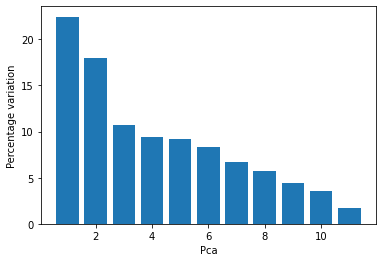

In [21]:
plt.bar(x=range(1,len(variance_percentage)+1),height=variance_percentage)
plt.xlabel('Pca')
plt.ylabel('Percentage variation')

We can see from  graph that upto Principle Component 8 that is (pc8) almost all the variations of the data are coverred.


In [22]:
pc_df = pd.DataFrame(transformed_data,columns=Labels)

In [23]:
pc_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.178368,2.154724,-0.775415,-0.608111,-0.022696,-0.665810,-1.479047,0.608947,0.065500,0.524422,0.314416
1,0.217938,-0.106971,-1.214493,-0.124216,0.214675,-0.302903,0.877171,0.170830,-0.661585,0.464994,0.070773
2,0.088374,-0.740142,0.064082,-0.364542,-0.033901,-0.237829,-0.508917,-0.079554,0.896825,-0.722011,0.530735
3,-0.251900,-0.047138,-0.591302,-0.145271,-0.211121,-0.263033,1.538901,-0.167050,-0.864184,0.527173,0.033242
4,0.888360,-0.684941,0.716851,-0.513535,1.585776,0.136119,0.419673,0.128837,-0.824809,-1.073299,-0.069899
...,...,...,...,...,...,...,...,...,...,...,...
9573,2.417438,4.595478,-0.831902,0.714433,0.117500,1.388619,3.774446,0.055398,1.709686,-0.740221,0.259938
9574,-1.305123,-0.301485,1.829175,-0.367624,-1.578064,0.454184,0.398360,-0.490949,0.241380,-0.638246,-0.065747
9575,0.844236,-1.344940,0.254717,0.652921,-1.578534,1.974528,0.544677,-0.939461,-0.563411,1.280243,0.300800
9576,0.786366,-0.962962,0.707440,-0.522513,-1.484968,0.999006,-1.184400,0.939032,-0.026266,-1.250838,-0.280549
